# PycWB Tutorial

## 0. Install dependencies

<!-- You can create the environment with conda, this will cost around 10 mins

```python
!pip install -q condacolab
import condacolab
condacolab.install()
```

```python
!conda install -c conda-forge -y -q healpix_cxx=3.81 root=6.26.10 cmake pkg-config
!conda install -c conda-forge -y -q nds2-client python-nds2-client
```

Here, to save the time. We download the ROOT binaries and other dependencies with `apt-get` -->

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


In [2]:
!mamba install -c conda-forge -y -q healpix_cxx=3.81 root=6.26.10 cmake pkg-config
!mamba install -c conda-forge -y -q nds2-client python-nds2-client

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... 

done
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


### Install pycwb package

In [3]:
!pip install pycwb
# !pip install "astropy<5.3" "matplotlib<3.7.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 46.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 90.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 115.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 142.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip3 install "packaging==24.2"

### Install deps for modules

In [3]:
!pip3 install -q healpy tensorflow basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 942.4/942.4 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 127.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 163.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 146.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 122.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 125.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 129.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 131.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 

In [4]:
!pip3 install ligo.gracedb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 86.7 MB/s eta 0:00:00


In [5]:
!pip3 install "matplotlib==3.10"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 87.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.4
    Uninstalling matplotlib-3.8.4:
      Successfully uninstalled matplotlib-3.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gwpy 3.0.12 requires packaging>=24.1, but you have packaging 23.2 which is incompatible.
basemap 1.4.1 requires matplotlib<3.9,>=1.5; python_version >= "3.5", but you have matplotlib 3.10.0 which is incompatible.


## 1. Run your first example

First, we download the example user parameter file

In [6]:
user_parameters = """
analysis: "2G"
cfg_search: "r"

optim: False

###### network configuration ######
ifo: ["L1","H1"]
refIFO: "L1"

inRate: 16384
# lags
lagSize: 1
lagStep: 1.
lagOff: 0
lagMax: 0

# superlags
slagSize: 0 # number of super lags (simulation=1) - if slagSize=0 -> Standard Segments
slagMin: 0
slagMax: 0
slagOff: 0

# job
segLen: 1200
segMLS: 600
segTHR: 200
segEdge: 10

# frequency
fLow: 16.
fHigh: 1024.


levelR: 3
l_low: 4 # low frequency resolution level		// std (sthr = 2)
l_high: 10 # high frequency resolution level	// std (sthr = 8)

wdmXTalk: "wdmXTalk/OverlapCatalog16-1024.bin"

healpix: 7

###### cWB production thresholds & regulators ######

bpp: 0.001
subnet: 0.5
subcut: 0.0
netRHO: 5.5
# cedRHO: 5.0
netCC: 0.5
Acore: 1.7
Tgap: 0.2
Fgap: 128.0
delta: 0.5
cfg_gamma: -1.0
LOUD: 300

pattern: 5

iwindow: 30

nSky: 196608

# simulation
# simulation: None
nfactor: 1
"""

with open('user_parameters.yaml', 'w') as fp:
    fp.write(user_parameters)

In [7]:
import os

import pycwb
from pycwb.config import Config
from pycwb.modules.logger import logger_init

if not os.environ.get('HOME_WAT_FILTERS'):
    pyburst_path = os.path.dirname(os.path.abspath(pycwb.__file__))
    os.environ['HOME_WAT_FILTERS'] = f"{os.path.abspath(pyburst_path)}/vendor"

logger_init()

config = Config('./user_parameters.yaml')

Welcome to JupyROOT 6.26/10
Loading wavelet library
Trying to load wavelet library from /usr/local/lib/python3.11/site-packages/lib/wavelet.so


/usr/local/lib/python3.11/site-packages/ROOT/_facade.py:153: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  return _orig_ihook(name, *args, **kwds)


25-03-20 11:44:09 - logger_init - INFO - Logging initialized
25-03-20 11:44:09 - logger_init - INFO - Logging level: INFO
25-03-20 11:44:09 - logger_init - INFO - Logging file: None
File OverlapCatalog16-1024.bin is available on https://github.com/PycWB/xtalk-data/raw/main.
File saved as /usr/local/lib/python3.11/site-packages/pycwb/vendor/wdmXTalk/OverlapCatalog16-1024.bin
25-03-20 11:44:22 - check_MRA_catalog - INFO - Checking MRA catalog
25-03-20 11:44:23 - load_MRA - INFO - Loading catalog of WDM cross-talk coefficients: /usr/local/lib/python3.11/site-packages/pycwb/vendor/wdmXTalk/OverlapCatalog16-1024.bin


generate injected data for each detector with given parameters in config

In [8]:
from pycwb.modules.read_data import read_from_catalog, read_from_online
from gwpy.timeseries import TimeSeries

import requests
from gwosc.locate import get_urls
t0 = 1126259462.4

data = []
for ifo in config.ifo:
  url = get_urls(ifo, t0, t0)[-1]

  print('Downloading: ' , url)
  fn = os.path.basename(url)
  with open(fn,'wb') as strainfile:
      straindata = requests.get(url)
      strainfile.write(straindata.content)

  strain = TimeSeries.read(fn,format='hdf5.gwosc')
  d = strain.crop(t0-150, t0+150)
  d_resampled = d.resample(2048)
  data.append(d_resampled)

Downloading:  http://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126257415-4096.hdf5
Downloading:  http://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5


apply data conditioning to the data

25-03-20 11:44:48 - whitening - INFO - WDM filter max length = 6.00048828125 (sec)
25-03-20 11:44:49 - whitening - INFO - WDM filter max length = 6.00048828125 (sec)
25-03-20 11:44:49 - data_conditioning - INFO - -------------------------------------------------------
25-03-20 11:44:49 - data_conditioning - INFO - Data Conditioning Time: 4.20 seconds
25-03-20 11:44:49 - data_conditioning - INFO - -------------------------------------------------------


((<pycwb.types.time_frequency_series.TimeFrequencySeries at 0x78fb6af183a0>,
  <pycwb.types.time_frequency_series.TimeFrequencySeries at 0x78fb6af184c0>),
 (<pycwb.types.time_frequency_series.TimeFrequencySeries at 0x78fb6af18640>,
  <pycwb.types.time_frequency_series.TimeFrequencySeries at 0x78fb6af18a00>))

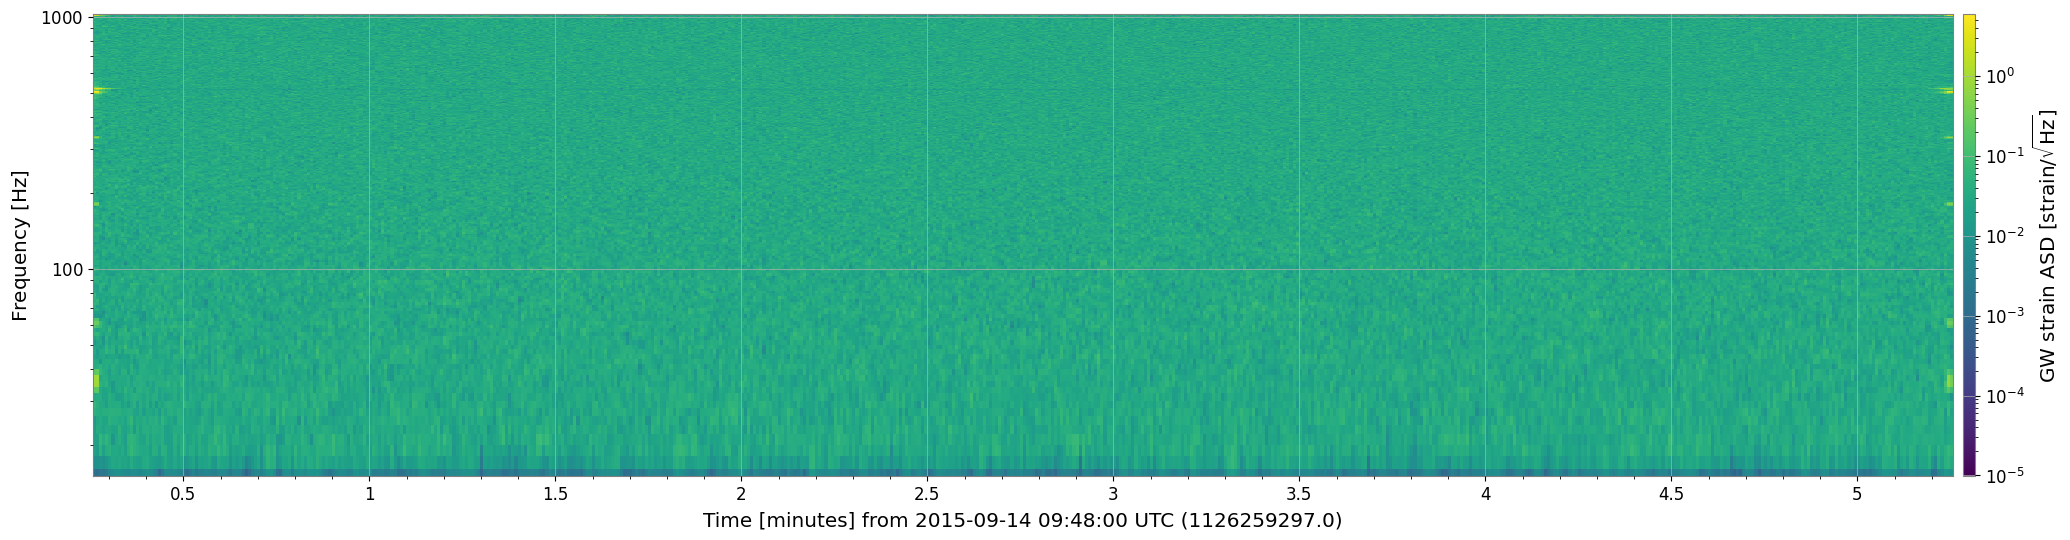

In [9]:
from pycwb.modules.data_conditioning import data_conditioning
from pycwb.modules.plot import plot_spectrogram

strains, nRMS = data_conditioning(config, data)

%matplotlib inline

# plot the spectrogram for L1
plt = plot_spectrogram(strains[0], gwpy_plot=True)
ax = plt.gca()
ax.set_ylim(15,1024)

strains, nRMS

calculate coherence

In [10]:
from pycwb.modules.coherence import coherence

# calculate coherence
fragment_clusters = coherence(config, strains, nRMS)

25-03-20 11:45:19 - coherence - INFO - Start coherence in parallel
level : 10	 rate(hz) : 2	 layers : 1024	 df(hz) : 1.000000	 dt(ms) : 500.000000 
max energy in units of noise variance: 8.66994 
thresholds in units of noise variance: Eo=8.67942 Emax=17.3588 
live time in zero lag: 280 
lag | clusters | pixels 
  0 |        3 |     27 
Coherence time for single level: 12.107866 s
level : 9	 rate(hz) : 4	 layers : 512	 df(hz) : 2.000000	 dt(ms) : 250.000000 
max energy in units of noise variance: 8.73875 
thresholds in units of noise variance: Eo=8.64409 Emax=17.2882 
live time in zero lag: 280 
lag | clusters | pixels 
  0 |        7 |     65 
Coherence time for single level: 12.153566 s
level : 7	 rate(hz) : 16	 layers : 128	 df(hz) : 8.000000	 dt(ms) : 62.500000 
max energy in units of noise variance: 9.40996 
thresholds in units of noise variance: Eo=8.6802 Emax=17.3604 
live time in zero lag: 280 
lag | clusters | pixels 
  0 |       12 |    179 
Coherence time for single level: 11

In [11]:
# %matplotlib inline
# from gwpy.spectrogram import Spectrogram
# for fragment_cluster in fragment_clusters:
#   for cluster in fragment_cluster.clusters:
#       merged_map, start, dt, df = cluster.get_sparse_map("likelihood")

#       plt = Spectrogram(merged_map, t0=start, dt=dt, f0=0, df=df).plot()
#       plt.colorbar()

supercluster

In [12]:
from pycwb.modules.super_cluster import supercluster
from pycwb.types.network import Network

network = Network(config, strains, nRMS)

pwc_list = supercluster(config, network, fragment_clusters, strains)

25-03-20 11:45:40 - set_time_shift - INFO - lag step: 1.0
25-03-20 11:45:40 - set_time_shift - INFO - number of time lags: 1
25-03-20 11:45:42 - sparse_table_from_fragment_clusters - INFO - ----------------------------------------
25-03-20 11:45:42 - sparse_table_from_fragment_clusters - INFO - Sparse series time: 2.28 s
25-03-20 11:45:42 - sparse_table_from_fragment_clusters - INFO - ----------------------------------------
25-03-20 11:45:44 - supercluster - INFO - -> Processing lag=0 ...
25-03-20 11:45:44 - supercluster - INFO -    --------------------------------------------------
25-03-20 11:45:44 - supercluster - INFO -     coher clusters|pixels      :     82|985
25-03-20 11:45:44 - supercluster - INFO -     super clusters|pixels      :     69|985
25-03-20 11:45:44 - supercluster - INFO -    defrag clusters|pixels      :     67|985
25-03-20 11:45:44 - supercluster - INFO -    subnet clusters|pixels      :      1|325
25-03-20 11:45:44 - supercluster - INFO - Supercluster done
25-03

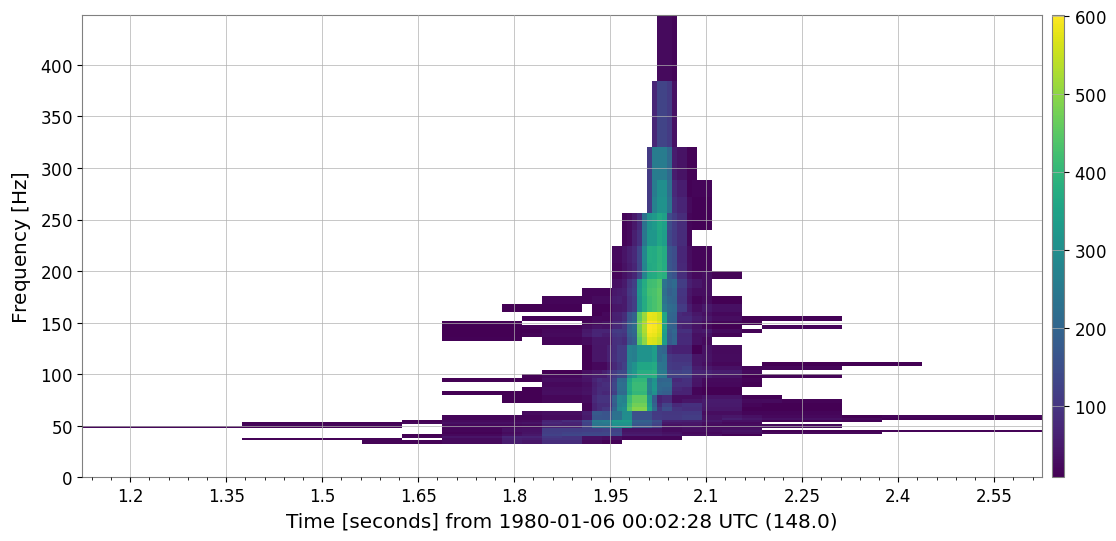

In [13]:
%matplotlib inline
from gwpy.spectrogram import Spectrogram

for cluster in pwc_list[0].clusters:
    merged_map, start, dt, df = cluster.get_sparse_map("likelihood")

    plt = Spectrogram(merged_map, t0=start, dt=dt, f0=0, df=df).plot()
    plt.colorbar()

Likelihood

In [14]:
from pycwb.modules.likelihood import likelihood

events, clusters, skymap_statistics = likelihood(config, network, pwc_list)

25-03-20 11:46:06 - likelihood - WARNING - The support of list type is only for backward compatibility. It will be deprecated in the future.
25-03-20 11:46:06 - likelihood - INFO - -------------------------------------------------------
25-03-20 11:46:06 - likelihood - INFO - -> Processing 1 clusters in lag=0
25-03-20 11:46:06 - likelihood - INFO -    ----------------------------------------------------
Selected core pixels: 1
   cluster-id|pixels:     1|325
	 -> SELECTED !!!
-------------------------------------------------------
Total events: 1
Total time: 6.44 s
-------------------------------------------------------
mchirp_2g : 1 1 3.70e+01 2.290 150.020 0.000 0.778 



plot statistics

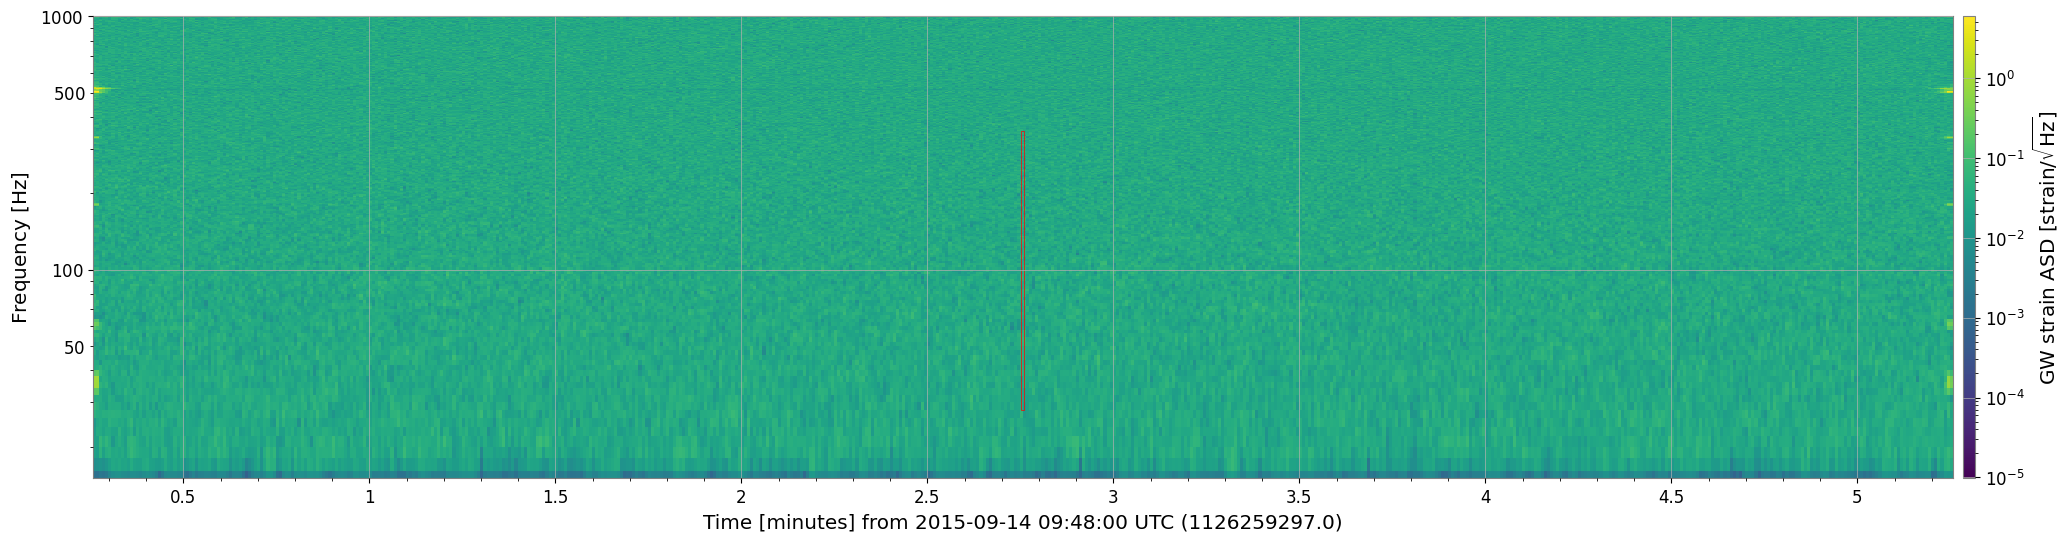

In [15]:
%matplotlib inline
from pycwb.modules.plot import plot_event_on_spectrogram

plt = plot_event_on_spectrogram(strains[0], events)
plt.show()

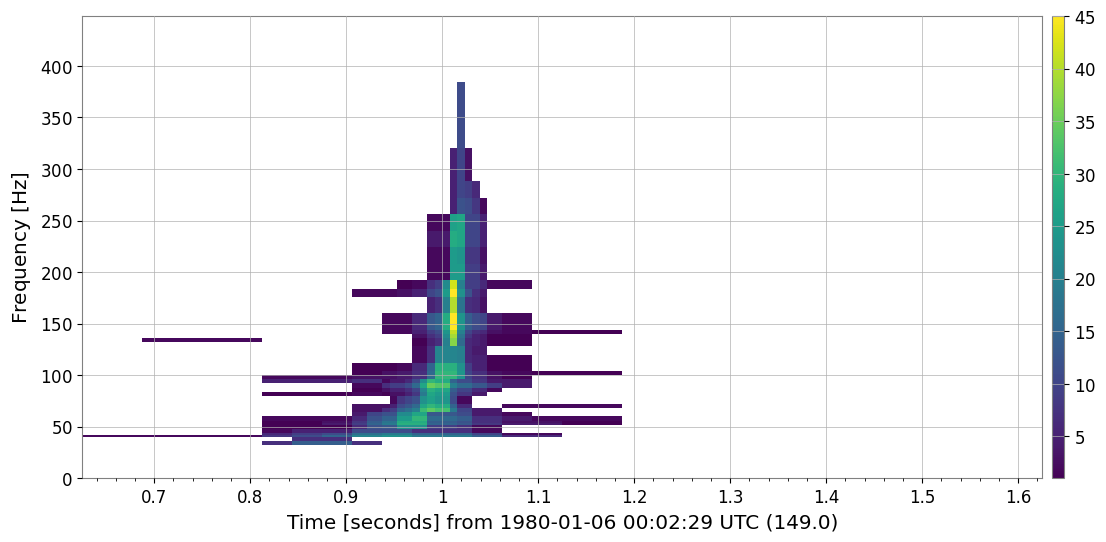

In [16]:
%matplotlib inline
from gwpy.spectrogram import Spectrogram

for cluster in clusters:
    merged_map, start, dt, df = cluster.get_sparse_map("likelihood")

    plt = Spectrogram(merged_map, t0=start, dt=dt, f0=0, df=df).plot()
    plt.colorbar()

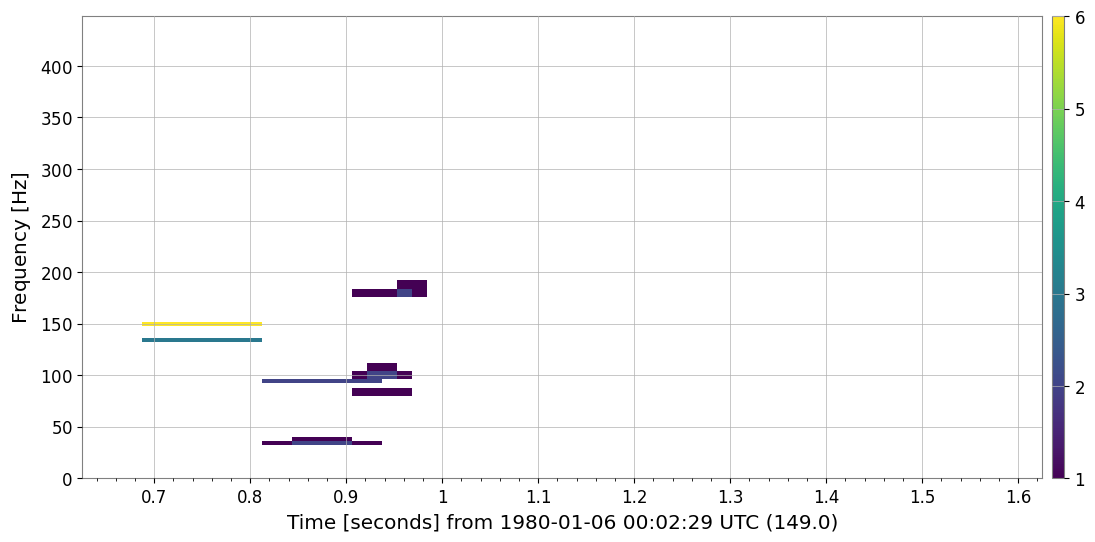

In [17]:
%matplotlib inline
from gwpy.spectrogram import Spectrogram

for cluster in clusters:
    merged_map, start, dt, df = cluster.get_sparse_map("null")

    plt = Spectrogram(merged_map, t0=start, dt=dt, f0=0, df=df).plot()
    plt.colorbar()

(149.75, 150.25)

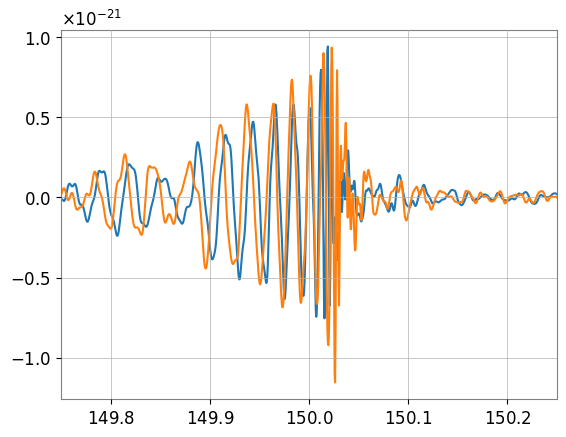

In [18]:
from pycwb.modules.reconstruction import get_network_MRA_wave
from pycwb.modules.plot.waveform import plot_reconstructed_waveforms
from matplotlib import pyplot as plt

event = events[0]
cluster = clusters[0]
reconstructed_waves = get_network_MRA_wave(config, cluster, config.rateANA, config.nIFO, config.TDRate,
                                               'signal', 0, True)
for reconstructed_wave in reconstructed_waves:
  plt.plot(reconstructed_wave.sample_times, reconstructed_wave.data)
plt.xlim((event.left[0], event.left[0] + event.stop[0] - event.start[0]))

In [19]:
events

[Event(nevent=1, ndim=2, run=0, rho=[16.82819938659668, np.float64(16.205471887395742), 0], netcc=[0, 0, 0], neted=[0, 0, 0, 0, 0], gnet=0.5499611496925354, anet=0.14632120728492737, inet=0.0, ecor=566.3797607421875, norm=6.398651599884033, ECOR=0.0, penalty=0, likelihood=641.0654296875, factor=0.0, range=[0], chirp=[0, 36.999935150146484, 2.290475845336914, 0.9884099960327148, 0.8796992301940918, 0.9492351412773132], eBBH=[], usize=0.0, ifo_list=[], eventID=[1, 0], type=[1], name=[], log=[], rate=[0, 0], volume=[325, 133], size=[135, 135], gap=[0, 0], lag=[0.0, 0.0, 0.0, 0.0], slag=(0, 0, 0), strain=[np.float64(6.759318677775653e-45)], phi=[353.8636363636364, 0, 134.62930895085447, 291.796875], theta=[155.69633519657742, 0, -65.69633519657742, 156.44354248046875], psi=[0.0], iota=[0.0], bp=[-0.5329943957257304, 0.7909650695827076], bx=[-0.22364054977265513, 0.11136299470683837], time=[1126259462.3962097, 1126259462.4034858], gps=[1126259312.3999023, 1126259312.3999023], right=[149.75,